# Demo column 

In [1]:
#Import dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import re
from matplotlib import pyplot as plt
from scipy.stats import linregress


In [2]:
#Import csv where we cleaned NAs
## 11682 rows 
cleaned_df = pd.read_csv("cleaned_data_js_sc_rg.csv", encoding = "ISO-8859-1")

cleaned_df.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA


In [3]:
# cleaned_df = cleaned_df.dropna()
# cleaned_df

## drop 11542

In [4]:
#11598 rows 
countries_df=cleaned_df[cleaned_df["Residence_ISO3"].notna()]
countries_df = pd.DataFrame(countries_df)
countries_df

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,14247.0,42057.81185,Extremely difficult,League of Legends,PC,20.0,I play for fun,winning,Unranked,20.0,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,20.0,23.0,25.0,USA,USA
11679,14248.0,42058.16964,Not difficult at all,Starcraft 2,PC,20.0,I play for fun,having fun,Ranked - Gold,14.0,...,High school diploma (or equivalent),Norway,Norway,Multiplayer,Accept,0.0,32.0,10.0,NOR,NOR
11680,14249.0,42058.24420,Somewhat difficult,Other,"Console (PS, Xbox, ...)",5.0,I play for fun,having fun,Unranked,0.0,...,High school diploma (or equivalent),Canada,Canada,Singleplayer,Accept,13.0,16.0,32.0,CAN,CAN
11681,14250.0,42058.36375,Somewhat difficult,Starcraft 2,PC,15.0,I play for fun,improving,Ranked - Diamond,8.0,...,High school diploma (or equivalent),Canada,Canada,Multiplayer,Accept,2.0,25.0,14.0,CAN,CAN


In [5]:
list_all = countries_df.columns
list_all

Index(['S. No.', 'Timestamp', 'GADE', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle', 'accept', 'GAD_T',
       'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')

In [6]:
# countries_df2 = pd.DataFrame(countries_df, columns = ['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
#        'Degree','Residence', 'Playstyle',])
# print(countries_df)

Is there a relationship between mental health disorder prevalence and different demographics?
- Degree |  hours
- GAD_T | SWL_T | SPIN_T
- Narcissism
- gender | age
- Work | earnings
- whyplay | playstyle
- League | Game
- Platform | streams

# summary satistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = countries_df.groupby('Gender').mean()['GAD_T']
median = countries_df.groupby('Gender').median()['GAD_T']
variance = countries_df.groupby('Gender').var()['GAD_T']
stdev = countries_df.groupby('Gender').std()['GAD_T']
sem = countries_df.groupby('Gender').sem()['GAD_T']

# Assemble the resulting series into a single summary dataframe.
summary_stat1 = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,
                        "Standard Deviation": stdev, "SEM":sem})
summary_stat1

,Mean,Median,Variance,Standard Deviation,SEM
Gender,,,,,
Female,7.776923,7.0,29.923966,5.470280,0.214562
Male,5.287718,4.0,20.734243,4.553487,0.043595
Other,10.315789,10.0,38.654339,6.217261,1.008573


#### Generalised Anxiety Disorder - GAD

In [8]:
GAD_mean = round(countries_df['GAD_T'].astype('float').mean(), 2)
GAD_median = round(countries_df['GAD_T'].astype('float').median(), 2)
GAD_mode = round(countries_df['GAD_T'].astype('float').mode(), 2)

print(f"GAD Rate Mean: {GAD_mean}")
print(f"GAD Rate Median {GAD_median}")
print(f"GAD Rate mode {GAD_mode}")

GAD Rate Mean: 5.44
GAD Rate Median 4.0
GAD Rate mode 0    2.0
dtype: float64


In [9]:
SWL_mean = round(countries_df['SWL_T'].astype('float').mean(), 2)
SWL_median = round(countries_df['SWL_T'].astype('float').median(), 2)
SWL_mode = round(countries_df['SWL_T'].astype('float').mode(), 2)

print(f"SWL Rate Mean: {SWL_mean}")
print(f"SWL Rate Median {SWL_median}")
print(f"SWL Rate mode {SWL_mode}")

SWL Rate Mean: 19.63
SWL Rate Median 20.0
SWL Rate mode 0    24.0
dtype: float64


## gender 

In [10]:
gender = countries_df.groupby(['S. No.', 'Gender'])
gender_df= pd.DataFrame(gender.size())

count_gender = pd.DataFrame(gender_df.groupby(['Gender']).count())
count_gender.columns = ['Total Count']
count_gender

,Total Count
Gender,
Female,650
Male,10910
Other,38


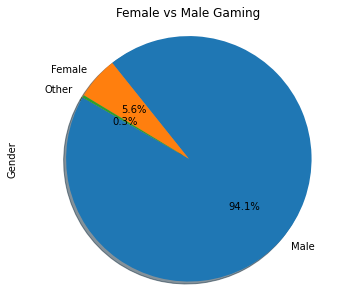

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_gender = countries_df['Gender'].value_counts()

fig1, ax1 = plt.subplots(figsize=(6,5))
pie = count_gender.plot.pie(figsize=(6,5), shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('Female vs Male Gaming')
plt.ylabel('Gender')

plt.axis('equal')
# plt.savefig("Male_vs_Females.png")
plt.show()

In [12]:
countries_df['GADE'].unique()

array(['Not difficult at all', 'Somewhat difficult', 'Very difficult',
       'Extremely difficult', nan], dtype=object)

In [13]:
countries_df['Gender'].value_counts()

Male      10910
Female      650
Other        38
Name: Gender, dtype: int64

# Age

In [14]:
# def group_age(Age):
# # countries_df['Age']
#     if age < 34:
#         return '18-34'
#     elif age < 44:
#         return '35-44'
#     else:
#         return '45-56'

In [15]:
# df_age = pd.DataFrame({'Age': np.random.randint(18, 56, 4)})
# df_age['age_bin'] = pd.cut(x=df_age['Age'], bins=[18, 24, 34, 44, 56])
# df_age

In [16]:
# age_group = pd.DataFrame({'Age':[18,24,34,44,56]})

# bins= [18,24,34,44,56]
# labels = ['Youth','Adult','young adult','middle-age adult']
# age_group['AgeGroup'] = pd.cut(age_group['Age'], bins=bins, labels=labels, right=False)
# print (countries_df)

In [17]:
# # create new data_age group by
# data_age = countries_df.copy()
# countries_df.loc[data_age['Age'].between(18,19), 'age_group'] = 'teenage'
# countries_df.loc[data_age['Age'].between(20,24), 'age_group'] = 'y_adult 20-24'
# countries_df.loc[data_age['Age'].between(25,39), 'age_group'] = 'adult 25-39'
# countries_df.loc[data_age['Age'].between(40,56), 'age_group'] = 'older_adult 40-56'
# data_age.head()

# Age group - help by Joanna

In [18]:
def group_age(age):
    if age < 19:
        return ("Teeanage")
    elif age < 24:
        return ("y_adult")
    elif age <39:
        return ("adult")
    elif age <56:
        return ("older_adult")

In [19]:
cleaned_df['Age_Groups'] = cleaned_df['Age'].map(group_age)
cleaned_df.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,Age_Groups
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA,adult
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA,older_adult
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU,adult
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA,adult
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA,y_adult


In [20]:
numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
by_age_df = cleaned_df.groupby(['Age_Groups']).agg(['count', 'mean', 'sum'])[numeric_columns]
by_age_df

GAD_T                    SWL_T                      SPIN_T  \
            count      mean      sum count       mean       sum  count   
Age_Groups                                                               
Teeanage     3077  5.639259  17352.0  3077  20.138447   61966.0   3077   
adult        2025  5.026667  10179.0  2025  19.707160   39907.0   2025   
older_adult    19  5.263158    100.0    19  19.736842     375.0     19   
y_adult      6560  5.491311  36023.0  6560  19.341159  126878.0   6560   

                                  
                  mean       sum  
Age_Groups                        
Teeanage     21.913877   67429.0  
adult        17.453827   35344.0  
older_adult  16.526316     314.0  
y_adult      20.268750  132963.0

In [21]:
by_age_df.index

Index(['Teeanage', 'adult', 'older_adult', 'y_adult'], dtype='object', name='Age_Groups')

In [22]:
GAD_age =['Teeanage', 'adult', 'older_adult', 'y_adult']
bins = ['Teeanage', 'adult', 'older_adult', 'y_adult']
GAD_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['GAD_T']
SWL_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['SWL_T']
SPIN_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['SPIN_T']
#GAD_age_df['Age_Group'] = GAD_age_df.index.values
print(GAD_age_df.dtypes)
SPIN_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['SPIN_T']
age_group_df = pd.DataFrame()
age_group_df['Age_Groups'] = GAD_age_df.index.values
age_group_df['GAD_age_df'] = GAD_age_df['mean'].values
age_group_df['SWL_age_df'] = SWL_age_df['mean'].values
age_group_df['SPIN_age_df'] = SPIN_age_df['mean'].values

age_group_df.head()

# GAD_age_df.plot(kind = "bar", color = 'lightpink', legend = None)
# SWL_age_df.plot(kind = "bar", color = 'lightblue', legend = None)

# plt.hist(GAD_age_df, bins = bins, alpha=0.5, label='x')
# pyplot.hist(y, bins, alpha=0.5, label='y')
# GAD_age_df.set_ylim(0,10)
# GAD_age_df.set_ylabel("Avarage score of GAD")
# GAD_age_df.set_xlabel("Age Groups")
# GAD_age_df.set_title("Histogram of Avarage GAD score vs. Age")
# plt.show()
#do the ANOVA

mean    float64
dtype: object


,Age_Groups,GAD_age_df,SWL_age_df,SPIN_age_df
0,Teeanage,5.639259,20.138447,21.913877
1,adult,5.026667,19.707160,17.453827
2,older_adult,5.263158,19.736842,16.526316
3,y_adult,5.491311,19.341159,20.268750


### age group - graph not working

In [23]:
# # Generate a bar plot showing the data of GAD_T for agegroup using Pandas.
# data_age = data_age.groupby(["age_group"]).count()["GAD_T"]

# # plot(kind='bar', figsize=(7,5), align='center', fontsize =8)
# data_age.plot(kind='bar', legend=False, rot=50, align='center')
# plt.title('GAD_T vs Age group')
# plt.ylabel('GAD_T')
# plt.xlabel('Age_group')
# # plt.savefig('Bar_chart1')
# plt.tight_layout
# data_age

### graph - help from Akash

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

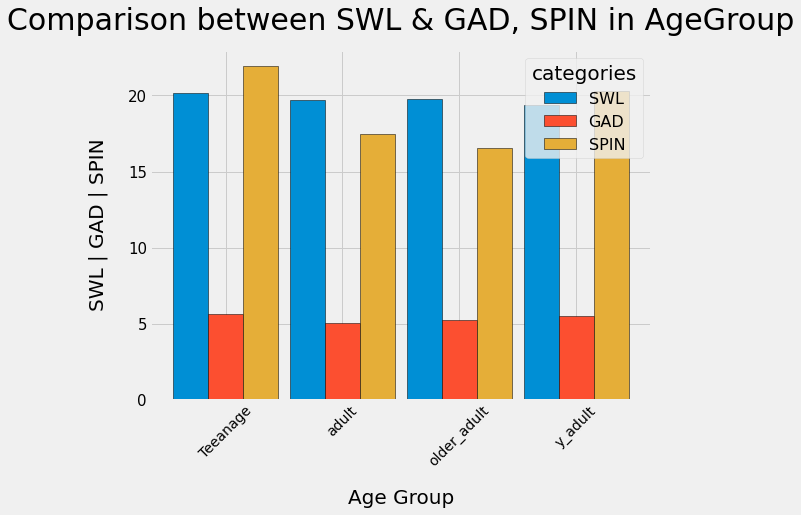

In [73]:
age_group_df['SWL_age_df'] = SWL_age_df['mean'].values
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")

#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (8,6))
#extract the labels
label = age_group_df['Age_Groups']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width,
              age_group_df["SWL_age_df"],
              width = width, 
               label = "SWL",
               edgecolor = "black"
              )
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x ,
              age_group_df["GAD_age_df"],
              width = width,
              label = "GAD",
              edgecolor = "black")
rect3 = ax.bar(x + width,
              age_group_df["SPIN_age_df"],
              width = width,
              label = "SPIN",
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("SWL | GAD | SPIN",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Age Group",
             fontsize = 20,
             labelpad =20)
ax.set_title("Comparison between SWL & GAD, SPIN in AgeGroup",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "categories",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 45)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

plt.savefig('AgeGroup_comparison')
plt.tight_layout





R squared: nan


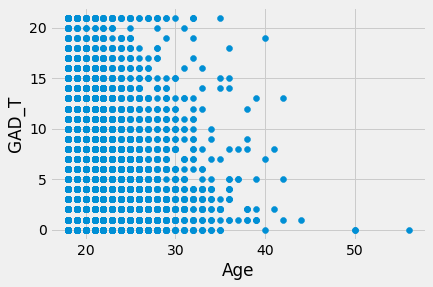

In [25]:
#  correlation
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = countries_df['Age'].astype('float')
y_values = countries_df['GAD_T'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Age')
plt.ylabel('GAD_T')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

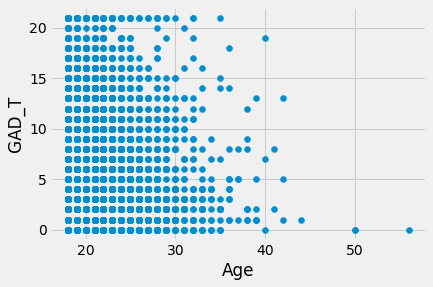

In [26]:
avg_gender = countries_df.loc[countries_df['Gender'] == 'Male', :]
maleavg= avg_gender.groupby('Gender').mean()
plt.scatter(avg_gender['Age'], avg_gender['GAD_T'])
plt.xlabel('Age')
plt.ylabel('GAD_T')
plt.savefig('scatterplot')
plt.show()

# GENDER

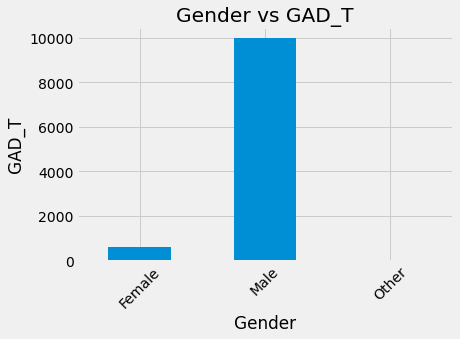

<Figure size 432x288 with 0 Axes>

In [27]:
# Filter data so it only includes gender type has GAD_T
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])


# Split up our data into groups based upon Gender
gender_group = countries_df.groupby('Gender')

# Find out gender type has GAD
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Gender vs GAD_T", rot=45)
chart.set_xlabel("Gender")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

#### TEST GENDER MEAN based on other link
https://www.dataquest.io/blog/pandas-tutorial-python-2/

In [28]:
# list all
cleaned_df.columns

Index(['S. No.', 'Timestamp', 'GADE', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle', 'accept', 'GAD_T',
       'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3', 'Age_Groups'],
      dtype='object')

In [29]:
countries_df['Gender'].value_counts()

Male      9973
Female     626
Other       37
Name: Gender, dtype: int64

In [30]:
male_no = countries_df[countries_df['Gender'] == 'Male']
female_no = countries_df[countries_df['Gender'] == 'Female']
other_no = countries_df[countries_df['Gender'] == 'Other']
print(male_no['GAD_T'].mean())
print(male_no['SWL_T'].mean())
print(male_no['SPIN_T'].mean())

5.784518199137672
19.318560112303217
20.400782111701595


### TEST based on Joanna and Akash formular

In [31]:
numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
by_gender_df = cleaned_df.groupby(['Gender']).agg(['count', 'mean', 'sum'])[numeric_columns]
by_gender_df

## F 653 | M 10984 | Other 45

GAD_T                     SWL_T                      SPIN_T  \
        count      mean      sum  count       mean       sum  count   
Gender                                                                
Female    653  7.785605   5084.0    653  18.906585   12346.0    653   
Male    10984  5.293518  58144.0  10984  19.673616  216095.0  10984   
Other      45  9.466667    426.0     45  16.000000     720.0     45   

                             
             mean       sum  
Gender                       
Female  28.295559   18477.0  
Male    19.684996  216220.0  
Other   30.111111    1355.0

In [32]:
# numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
# by_gender_df = countries_df.groupby(['Gender']).agg(['count', 'mean', 'sum'])[numeric_columns]
# by_gender_df

# ## F 626 | M 9973 | Other 37

In [33]:
by_gender_df.index

Index(['Female', 'Male', 'Other'], dtype='object', name='Gender')

In [34]:
bin_gender =['Female', 'Male', 'Other']
GAD_gender_df = cleaned_df.groupby(['Gender']).agg(['mean']).loc[bin_gender]['GAD_T']
SWL_gender_df = cleaned_df.groupby(['Gender']).agg(['mean']).loc[bin_gender]['SWL_T']
SPIN_gender_df = cleaned_df.groupby(['Gender']).agg(['mean']).loc[bin_gender]['SPIN_T']
#GAD_age_df['Age_Group'] = GAD_age_df.index.values
print(GAD_gender_df.dtypes)
SPIN_age_df = cleaned_df.groupby(['Gender']).agg(['mean']).loc[bin_gender]['SPIN_T']
gender_group_df = pd.DataFrame()
gender_group_df['Gender'] = GAD_gender_df.index.values
gender_group_df['GAD_age_df'] = GAD_gender_df['mean'].values
gender_group_df['SWL_age_df'] = SWL_gender_df['mean'].values
gender_group_df['SPIN_age_df'] = SPIN_gender_df['mean'].values

gender_group_df.head()

mean    float64
dtype: object


,Gender,GAD_age_df,SWL_age_df,SPIN_age_df
0,Female,7.785605,18.906585,28.295559
1,Male,5.293518,19.673616,19.684996
2,Other,9.466667,16.000000,30.111111


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

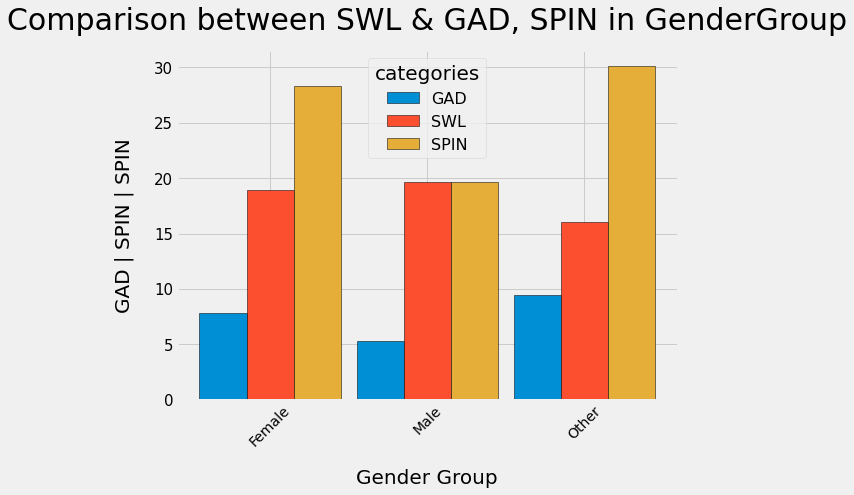

In [72]:
gender_group_df['GAD_gender_df'] = GAD_gender_df['mean'].values
gender_group_df['SWL_gender_df'] = SWL_gender_df['mean'].values
gender_group_df['SPIN_gender_df'] = SPIN_gender_df['mean'].values
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")

#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (8,6))
#extract the labels
label = gender_group_df['Gender']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width,
              gender_group_df["GAD_gender_df"],
              width = width, 
               label = "GAD",
               edgecolor = "black")
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x ,
              gender_group_df["SWL_gender_df"],
              width = width,
              label = "SWL",
              edgecolor = "black")
rect3 = ax.bar(x + width,
              gender_group_df["SPIN_gender_df"],
              width = width,
              label = "SPIN",
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("GAD | SPIN | SPIN",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Gender Group",
             fontsize = 20,
             labelpad =20)
ax.set_title("Comparison between SWL & GAD, SPIN in GenderGroup",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "categories",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 45)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

plt.savefig('Gender_comparison')
plt.tight_layout


# Employment

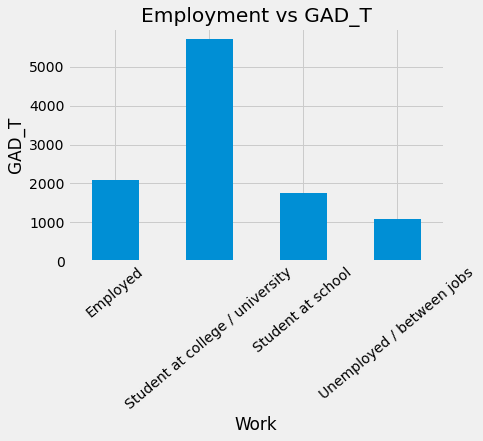

<Figure size 432x288 with 0 Axes>

In [36]:
# Filter data so it only includes patrons who checked out at least one item
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
gender_group = countries_df.groupby('Work')

# Find out how many of each patron type borrowed library items
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Employment vs GAD_T", rot=40)
chart.set_xlabel("Work")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

## test based on Joanna and Akash suggest

In [37]:
# numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
# by_work_df = countries_df.groupby(['Work']).agg(['count', 'mean', 'sum'])[numeric_columns]
# by_work_df

# ## E 2085 | Stu_uni 5708 | School  1746 | Unemp  1097

In [38]:
numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
by_work_df = cleaned_df.groupby(['Work']).agg(['count', 'mean', 'sum'])[numeric_columns]
by_work_df

## E 2361 | Stu_uni 6236 | School  1890 | Unemp  1195

GAD_T                    SWL_T             \
                                count      mean      sum count       mean   
Work                                                                        
Employed                         2361  4.799661  11332.0  2361  20.577298   
Student at college / university  6236  5.426074  33837.0  6236  20.156671   
Student at school                1890  5.557143  10503.0  1890  19.940212   
Unemployed / between jobs        1195  6.679498   7982.0  1195  14.388285   

                                          SPIN_T                       
                                      sum  count       mean       sum  
Work                                                                   
Employed                          48583.0   2361  17.686997   41759.0  
Student at college / university  125697.0   6236  20.069756  125155.0  
Student at school                 37687.0   1890  21.794709   41192.0  
Unemployed / between jobs         17194.0   1195  23.385774   27946.0

In [39]:
by_work_df.index

Index(['Employed', 'Student at college / university', 'Student at school',
       'Unemployed / between jobs'],
      dtype='object', name='Work')

In [40]:
bin_work =['Employed', 'Student at college / university', 'Student at school', 'Unemployed / between jobs']
GAD_work_df = cleaned_df.groupby(['Work']).agg(['mean']).loc[bin_work]['GAD_T']
SWL_work_df = cleaned_df.groupby(['Work']).agg(['mean']).loc[bin_work]['SWL_T']
SPIN_work_df = cleaned_df.groupby(['Work']).agg(['mean']).loc[bin_work]['SPIN_T']

print(GAD_work_df.dtypes)
SPIN_work_df = cleaned_df.groupby(['Work']).agg(['mean']).loc[bin_work]['SPIN_T']
work_group_df = pd.DataFrame()
work_group_df['Work'] = GAD_work_df.index.values
work_group_df['GAD_work_df'] = GAD_work_df['mean'].values
work_group_df['SWL_work_df'] = SWL_work_df['mean'].values
work_group_df['SPIN_work_df'] = SPIN_work_df['mean'].values

work_group_df.head()

mean    float64
dtype: object


,Work,GAD_work_df,SWL_work_df,SPIN_work_df
0,Employed,4.799661,20.577298,17.686997
1,Student at college / university,5.426074,20.156671,20.069756
2,Student at school,5.557143,19.940212,21.794709
3,Unemployed / between jobs,6.679498,14.388285,23.385774


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

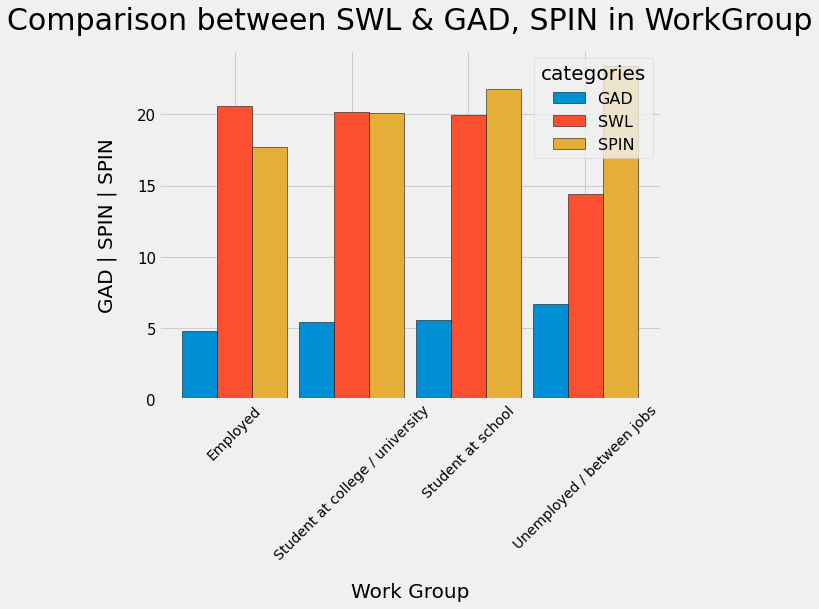

In [74]:
work_group_df['GAD_work_df'] = GAD_work_df['mean'].values
work_group_df['SWL_work_df'] = SWL_work_df['mean'].values
work_group_df['SPIN_work_df'] = SPIN_work_df['mean'].values
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")

#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (8,6))
#extract the labels
label = work_group_df['Work']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width,
              work_group_df["GAD_work_df"],
              width = width, 
               label = "GAD",
               edgecolor = "black")
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x ,
              work_group_df["SWL_work_df"],
              width = width,
              label = "SWL",
              edgecolor = "black")
rect3 = ax.bar(x + width,
              work_group_df["SPIN_work_df"],
              width = width,
              label = "SPIN",
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("GAD | SPIN | SPIN",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Work Group",
             fontsize = 20,
             labelpad =20)
ax.set_title("Comparison between SWL & GAD, SPIN in WorkGroup",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "categories",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 45)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

plt.savefig('Work_comparison')
plt.tight_layout


# Degree/ education

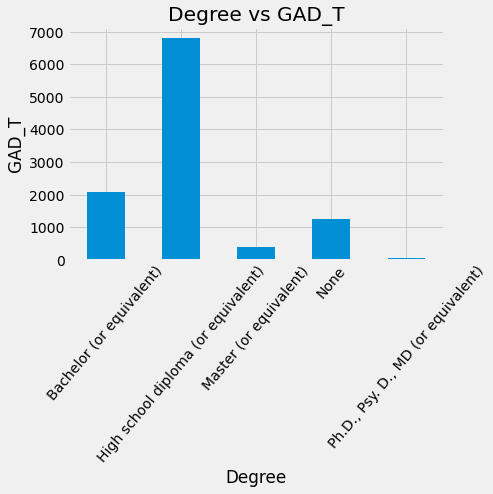

<Figure size 432x288 with 0 Axes>

In [42]:
# Filter data so it only includes patrons who checked out at least one item
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
gender_group = countries_df.groupby('Degree')

# Find out how many of each patron type borrowed library items
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Degree vs GAD_T", rot=50)
chart.set_xlabel("Degree")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

# test based on Joanna and Akash

In [47]:
numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
by_degree_df = cleaned_df.groupby(['Degree']).agg(['count', 'mean', 'sum'])[numeric_columns]
by_degree_df

GAD_T                    SWL_T             \
                                    count      mean      sum count       mean   
Degree                                                                          
Bachelor (or equivalent)             2335  5.031692  11749.0  2335  20.617131   
High school diploma (or equivalent)  7440  5.588575  41579.0  7440  19.139516   
Master (or equivalent)                474  4.723629   2239.0   474  21.936709   
None                                 1352  5.684172   7685.0  1352  19.446006   
Ph.D., Psy. D., MD (or equivalent)     81  4.962963    402.0    81  23.864198   

                                              SPIN_T                       
                                          sum  count       mean       sum  
Degree                                                                     
Bachelor (or equivalent)              48141.0   2335  17.740043   41423.0  
High school diploma (or equivalent)  142398.0   7440  20.886559  155396.0  
Master (or equivalent)                10398.0    474  16.434599    7790.0  
None                                  26291.0   1352  22.274408   30115.0  
Ph.D., Psy. D., MD (or equivalent)     1933.0     81  16.395062    1328.0

In [48]:
by_degree_df.index

Index(['Bachelor (or equivalent)', 'High school diploma (or equivalent)',
       'Master (or equivalent)', 'None', 'Ph.D., Psy. D., MD (or equivalent)'],
      dtype='object', name='Degree')

In [53]:
print(cleaned_df.columns)

Index(['S. No.', 'Timestamp', 'GADE', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle', 'accept', 'GAD_T',
       'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3', 'Age_Groups'],
      dtype='object')


In [62]:
# bin_degree=['Bachelor (or equivalent)', 'High school diploma (or equivalent)',
#       'Master (or equivalent)', 'None', 'Ph.D., Psy. D., MD (or equivalent)']

bin_degree=['High school diploma (or equivalent)', 'None', 'Ph.D., Psy. D., MD (or equivalent)']
GAD_degree_df = cleaned_df.groupby(['Degree']).agg(['mean']).loc[bin_degree]['GAD_T']
SWL_degree_df = cleaned_df.groupby(['Degree']).agg(['mean']).loc[bin_degree]['SWL_T']
SPIN_degree_df = cleaned_df.groupby(['Degree']).agg(['mean']).loc[bin_degree]['SPIN_T']

print(GAD_degree_df.dtypes)
SPIN_degree_df = cleaned_df.groupby(['Degree']).agg(['mean']).loc[bin_degree]['SPIN_T']
degree_group_df = pd.DataFrame()
degree_group_df['Degree'] = GAD_degree_df.index.values
degree_group_df['GAD_Degree_df'] = GAD_degree_df['mean'].values
degree_group_df['SWL_Degree_df'] = SWL_degree_df['mean'].values
degree_group_df['SPIN_Degree_df'] = SPIN_degree_df['mean'].values

degree_group_df.head()

mean    float64
dtype: object


,Degree,GAD_Degree_df,SWL_Degree_df,SPIN_Degree_df
0,High school diploma (or equivalent),5.588575,19.139516,20.886559
1,None,5.684172,19.446006,22.274408
2,"Ph.D., Psy. D., MD (or equivalent)",4.962963,23.864198,16.395062


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

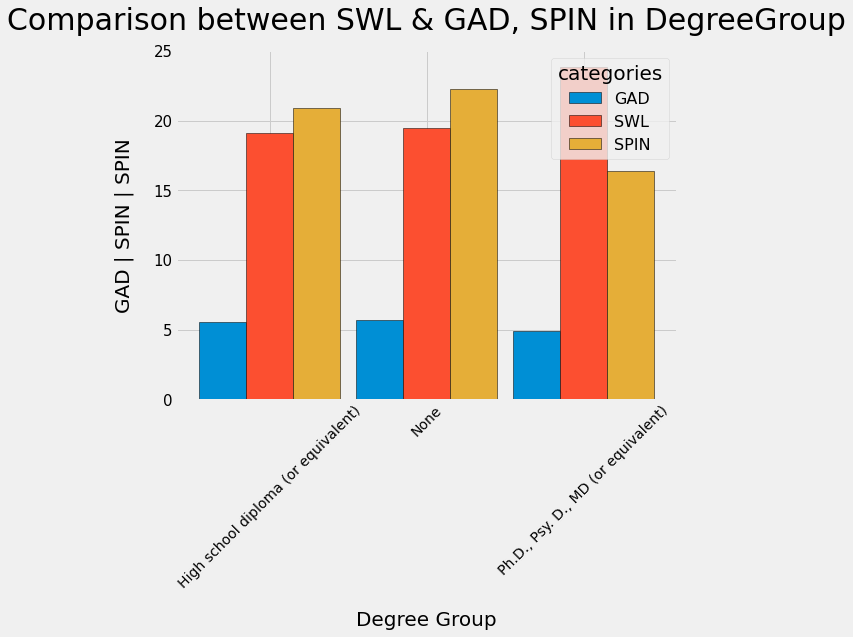

In [75]:
degree_group_df['GAD_degree_df'] = GAD_degree_df['mean'].values
degree_group_df['SWL_degree_df'] = SWL_degree_df['mean'].values
degree_group_df['SPIN_degree_df'] = SPIN_degree_df['mean'].values
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")

#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (8,6))
#extract the labels
label = degree_group_df['Degree']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width,
              degree_group_df["GAD_degree_df"],
              width = width, 
               label = "GAD",
               edgecolor = "black")
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x ,
              degree_group_df["SWL_degree_df"],
              width = width,
              label = "SWL",
              edgecolor = "black")
rect3 = ax.bar(x + width,
              degree_group_df["SPIN_degree_df"],
              width = width,
              label = "SPIN",
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("GAD | SPIN | SPIN",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Degree Group",
             fontsize = 20,
             labelpad =20)
ax.set_title("Comparison between SWL & GAD, SPIN in DegreeGroup",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "categories",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 45)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

plt.savefig('Degree_comparison')
plt.tight_layout

# USA

In [64]:
resident_df = countries_df['Residence'].value_counts()
resident_df

USA            3649
Germany        1142
UK              816
Canada          797
Netherlands     401
               ... 
Grenada           1
Cyprus            1
Indonesia         1
Jamaica           1
Palestine         1
Name: Residence, Length: 105, dtype: int64

In [65]:
work_df = countries_df['Work'].unique()
work_df

array(['Unemployed / between jobs', 'Employed',
       'Student at college / university', 'Student at school'],
      dtype=object)

In [66]:
work_df = countries_df['Work'].value_counts()
work_df

Student at college / university    5708
Employed                           2085
Student at school                  1746
Unemployed / between jobs          1097
Name: Work, dtype: int64

In [67]:
# create new file - Filter data to national settlements
USA_set = countries_df.loc[countries_df["Residence"]=="USA",:]
USA_set

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
5,6.0,42052.13119,Not difficult at all,Other,"Console (PS, Xbox, ...)",4.0,I play for fun,relaxing,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,1.0,17.0,13.0,USA,USA
7,9.0,42052.19737,Very difficult,Other,"Console (PS, Xbox, ...)",2.0,I play for fun,winning,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,12.0,12.0,55.0,USA,USA
9,11.0,42052.24204,Somewhat difficult,Other,PC,14.0,I play for fun,having fun,Unranked,0.0,...,High school diploma (or equivalent),USA,USA,Singleplayer,Accept,19.0,27.0,6.0,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,14231.0,42056.37289,Somewhat difficult,Other,PC,21.0,I play for fun,having fun,Unranked,0.0,...,None,USA,USA,Multiplayer,Accept,11.0,28.0,13.0,USA,USA
11670,14237.0,42056.67219,Not difficult at all,League of Legends,PC,20.0,I play for fun,winning,Ranked - Gold,1.0,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,2.0,27.0,33.0,USA,USA
11671,14238.0,42056.81326,Somewhat difficult,League of Legends,PC,10.0,I play for fun,having fun,Ranked - Silver,1.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,2.0,17.0,23.0,USA,USA
11676,14245.0,42057.35267,Not difficult at all,League of Legends,PC,30.0,I play for fun,having fun,Ranked - Silver,10.0,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,6.0,16.0,12.0,USA,USA


In [68]:
work_count_USA = USA_set['Work'].value_counts()
work_count_USA

Student at college / university    1912
Employed                            864
Student at school                   571
Unemployed / between jobs           302
Name: Work, dtype: int64

In [69]:
# Create new dataframe for data to chart
compare_employment = pd.DataFrame({"USA Employment": work_count_USA,
                                       "All National_employment": work_df})
compare_employment

,USA Employment,All National_employment
Student at college / university,1912,5708
Employed,864,2085
Student at school,571,1746
Unemployed / between jobs,302,1097


In [70]:
# Fill NA
compare_employment = compare_employment.fillna(0)
compare_employment

,USA Employment,All National_employment
Student at college / university,1912,5708
Employed,864,2085
Student at school,571,1746
Unemployed / between jobs,302,1097


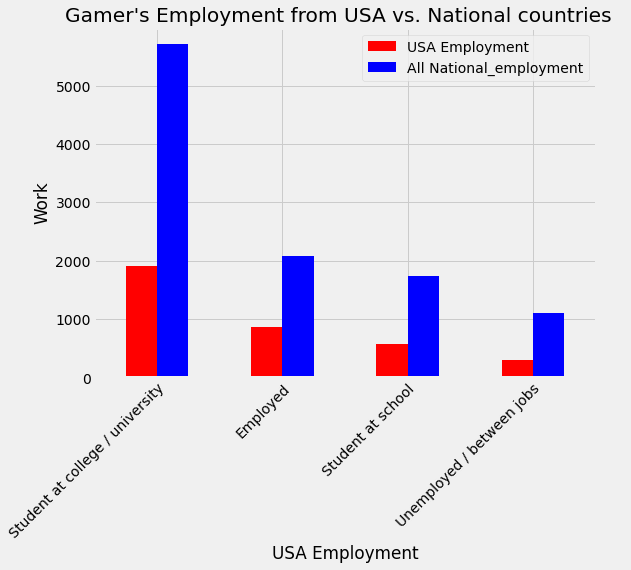

In [71]:
# Configure plot, figsize, title, and axis labels
figure1 = compare_employment.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                                   title="Gamer's Employment from USA vs. National countries  ",
                                   xlabel="USA Employment",
                                   ylabel="Work")

# Configure x-tick rotation
xticklabels = compare_employment.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()